<a href="https://colab.research.google.com/github/Rutuja235/HeartCare-ML-Powered-Prediction-of-Cardiovascular-Risk/blob/main/Heart_Disease__Final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.0


In [ ]:

df = pd.read_csv('/content/Heart_Disease_Dataset (1).csv')
df.shape

(1190, 12)

In [ ]:
df.head(3)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [ ]:
df.target.unique() # Remove the parentheses after target and add .unique()



array([0, 1])

In [ ]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

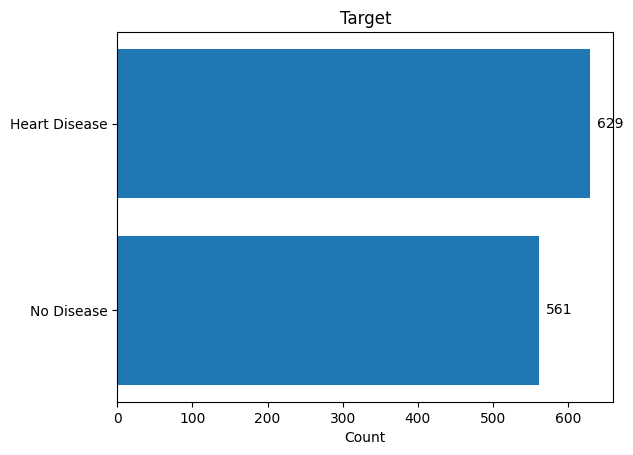

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

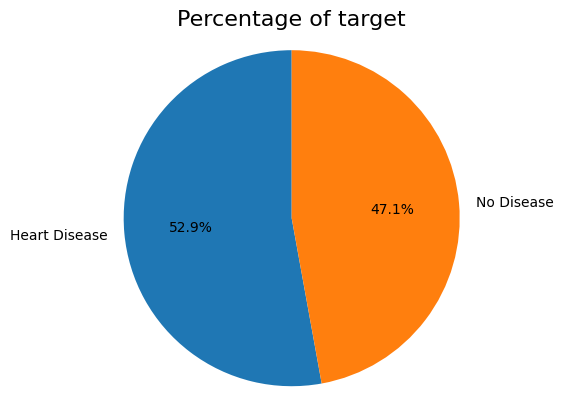

In [ ]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [ ]:


df.isna().sum() # missing values



,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [ ]:


qualitative



['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [ ]:
quantitative

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

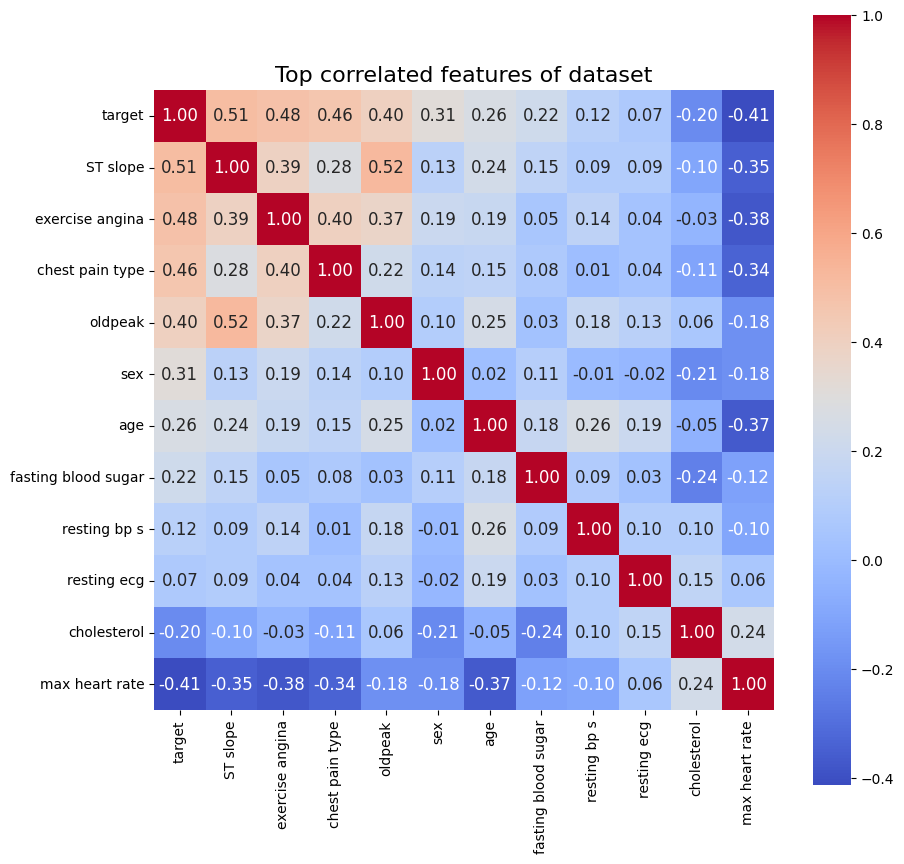

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [ ]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""



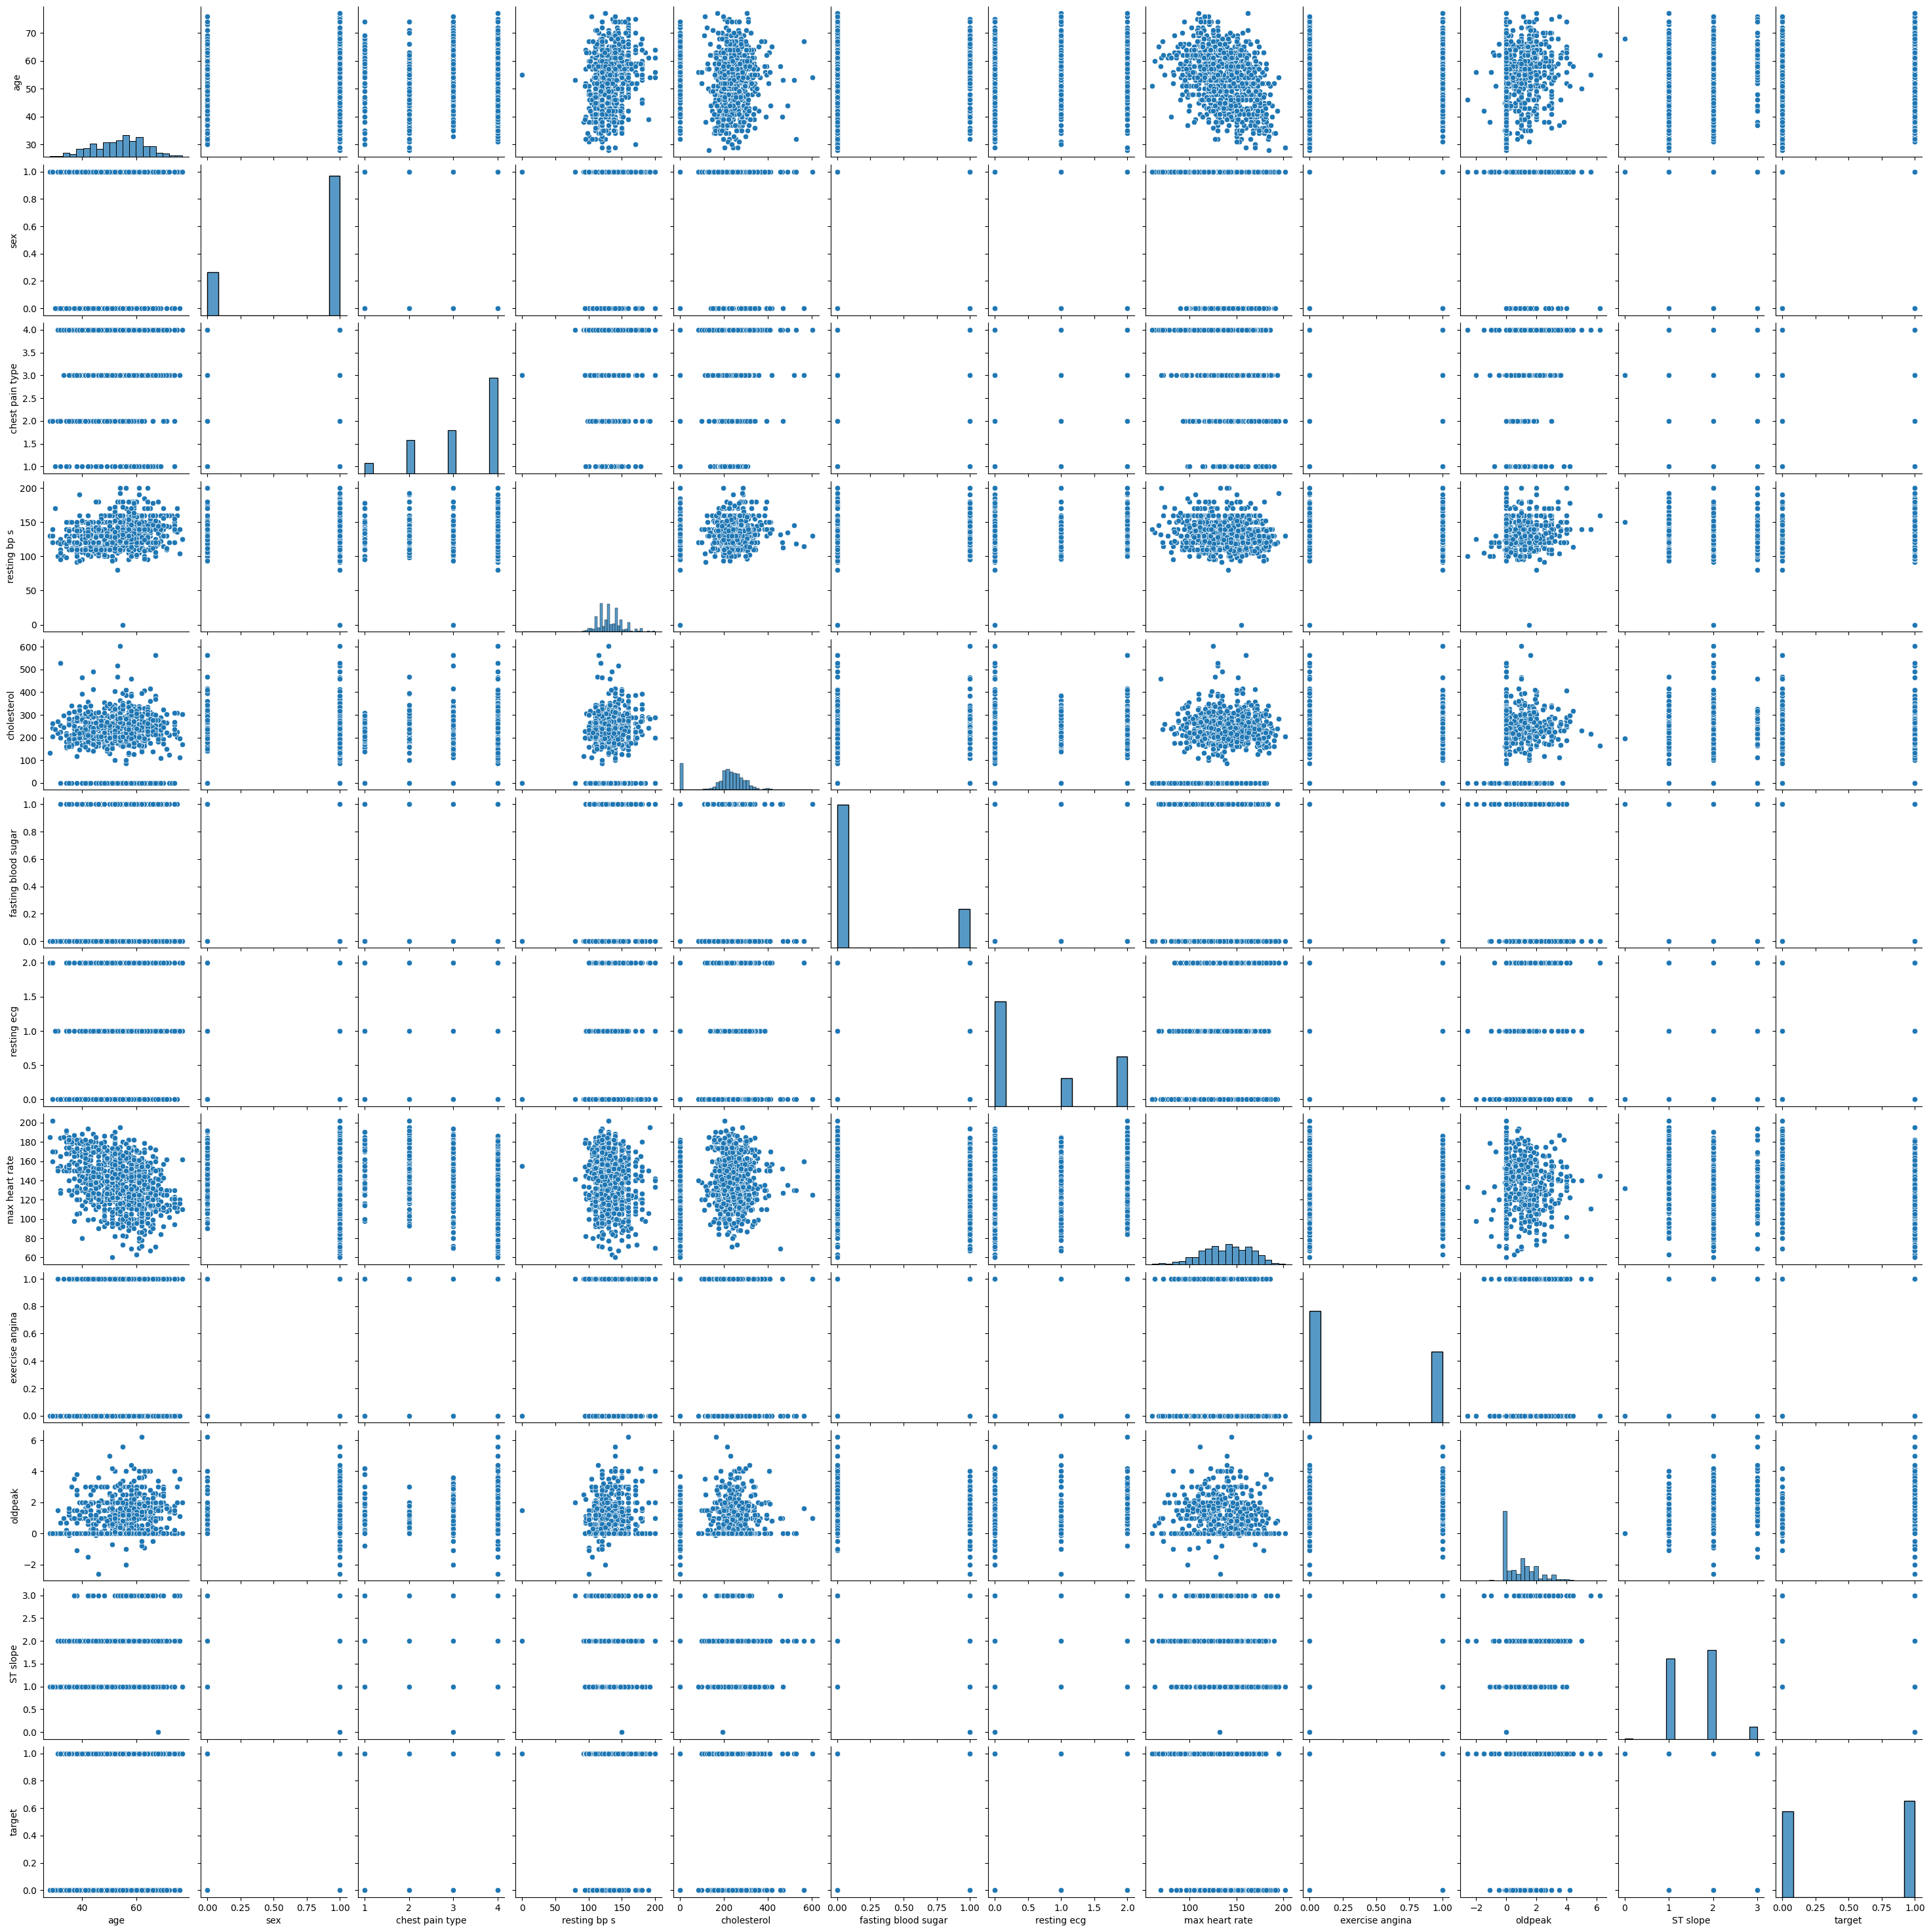

In [ ]:


sns.pairplot(df)



In [ ]:
df.target


,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [ ]:
X = df.drop('target', axis=1) # or X = df.drop(columns=['TenYearCHD'])
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1190, 11) (1190,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (952, 11) (952,)
shape of X and y respectively (test) : (238, 11) (238,)


In [ ]:
# Assuming 'df' is your DataFrame

# Drop rows with any missing values in X_train and X_test
X_train = X_train.dropna()
X_test = X_test.dropna()
# Reset the index
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]



In [ ]:
#LR Algorithm
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8371848739495799
Testing Score: 0.7941176470588235
   Predicted
0          1
1          1
2          1
3          1
4          1
% of people predicted with heart-disease: 0.5462184873949579
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       109
           1       0.81      0.81      0.81       129

    accuracy                           0.79       238
   macro avg       0.79      0.79      0.79       238
weighted avg       0.79      0.79      0.79       238



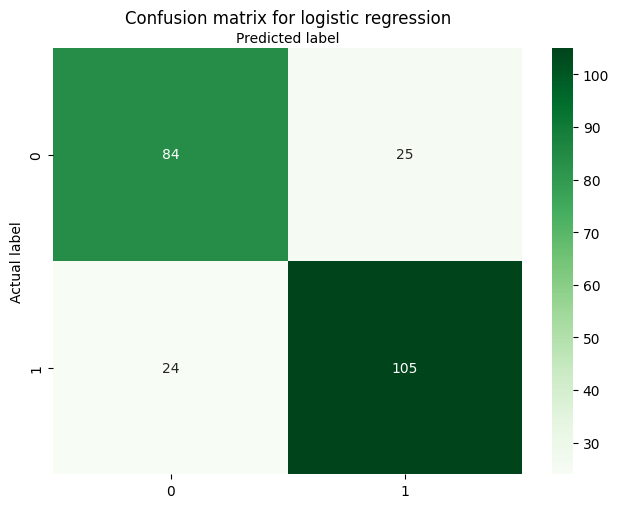

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

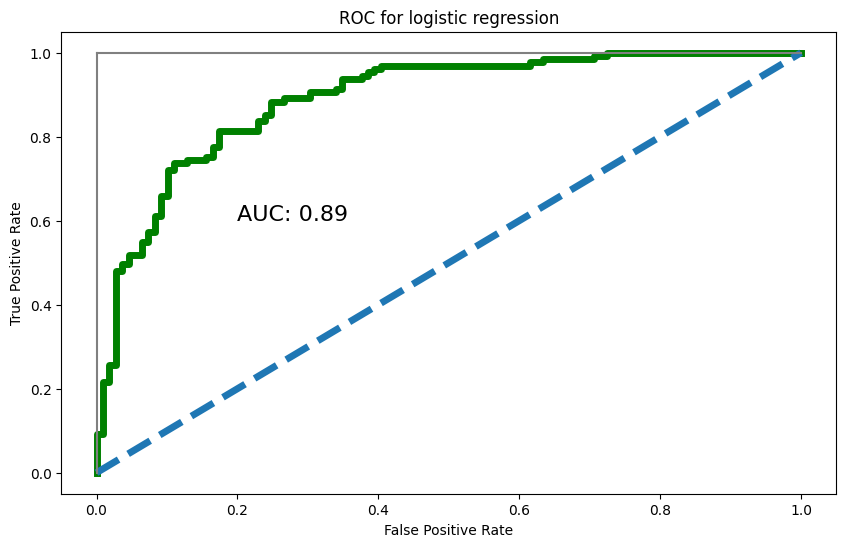

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#DTree Algorithm
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.8371848739495799
Testing Score: 0.7941176470588235
   Predicted
0          1
1          1
2          1
3          1
4          1
% of people predicted with heart-disease: 0.5462184873949579
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       109
           1       0.81      0.81      0.81       129

    accuracy                           0.79       238
   macro avg       0.79      0.79      0.79       238
weighted avg       0.79      0.79      0.79       238



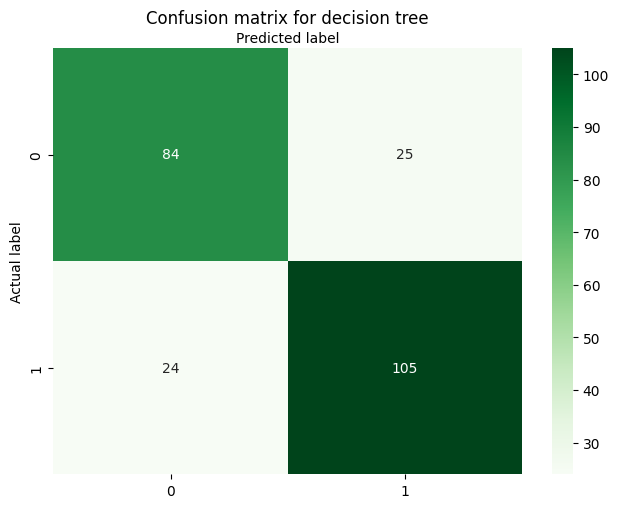

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

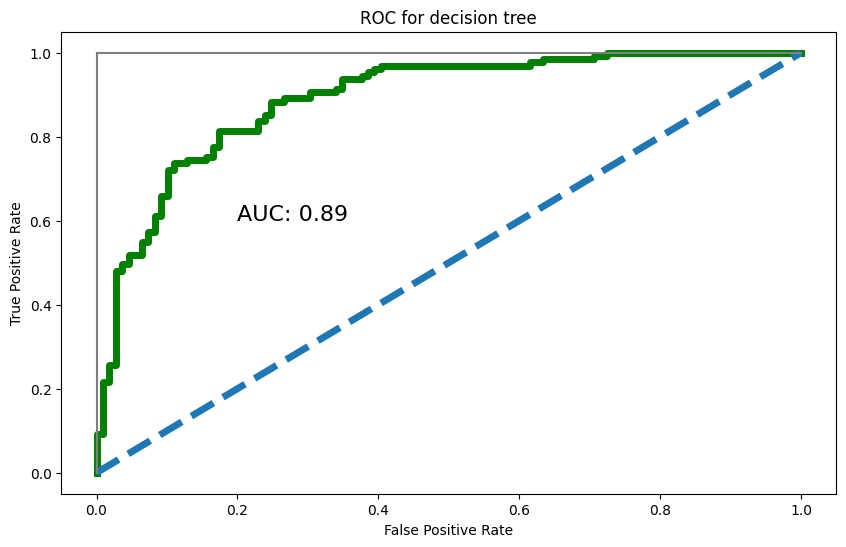

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Random Forest
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.9369747899159664
   Predicted
0          1
1          1
2          1
3          1
4          1
% of people predicted with heart-disease: 0.5546218487394958
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.93      0.95      0.94       129

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



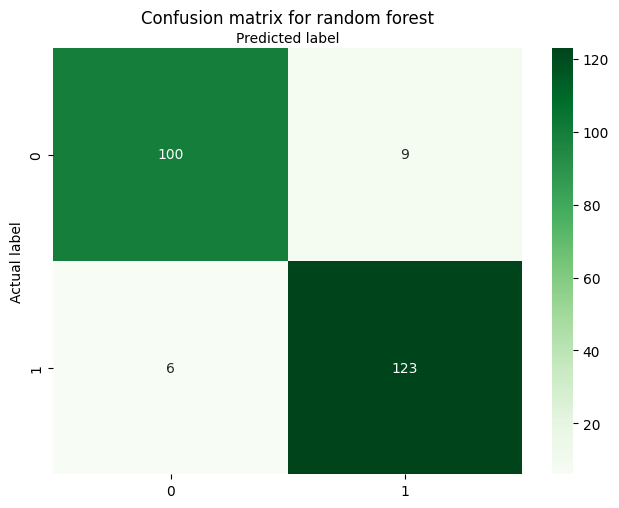

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

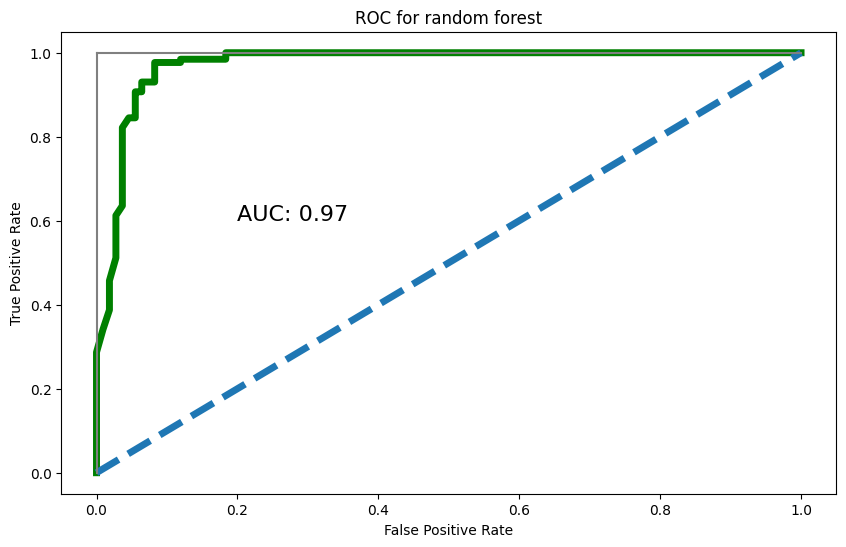

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:


# ... (your previous imports and data loading)

# KNN Algorithm with Hyperparameter Tuning
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Create and fit the GridSearchCV object
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best parameters:", grid_search.best_params_)


best_knn_model = grid_search.best_estimator_

# Make predictions using the best model
Y_pred = best_knn_model.predict(X_test)

# Evaluate the model
score = best_knn_model.score(X_test, y_test)
print('Testing Score:', score)

# ... (rest of your evaluation code)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))




KNeighborsClassifier
Best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Testing Score: 0.8529411764705882
   Predicted
0          0
1          1
2          1
3          1
4          1
% of people predicted with heart-disease: 0.5630252100840336
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.85      0.88      0.87       129

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [ ]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.8277310924369747


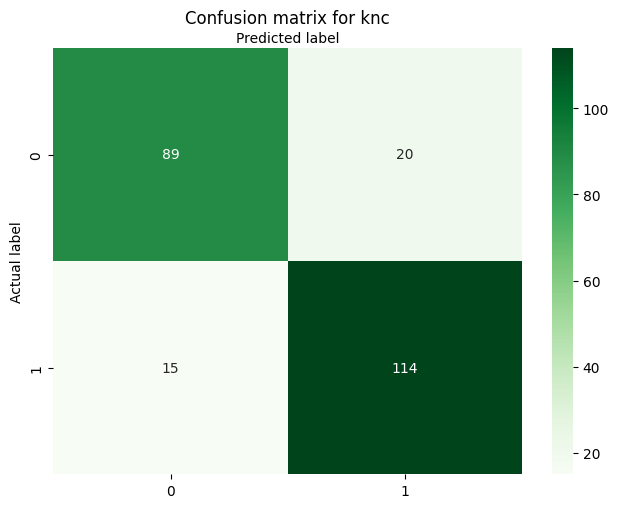

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

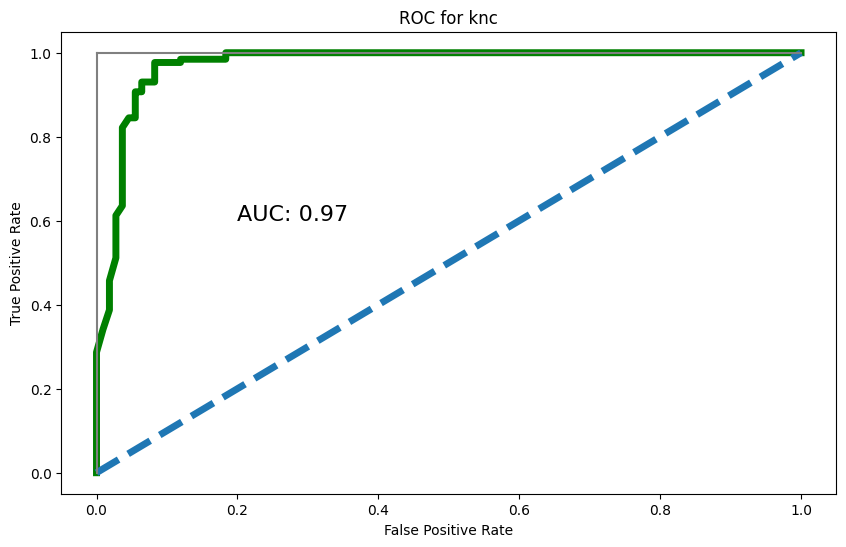

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# SVM Algorithm
print('SVM')
from sklearn import svm
# Set probability=True when initializing the SVC object
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_svm = score
out_svm = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

SVM
Training Score: 0.8455882352941176
Testing Score: 0.8025210084033614
   Predicted
0          1
1          1
2          1
3          1
4          1
% of people predicted with heart-disease: 0.5462184873949579
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       109
           1       0.82      0.82      0.82       129

    accuracy                           0.80       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.80      0.80       238



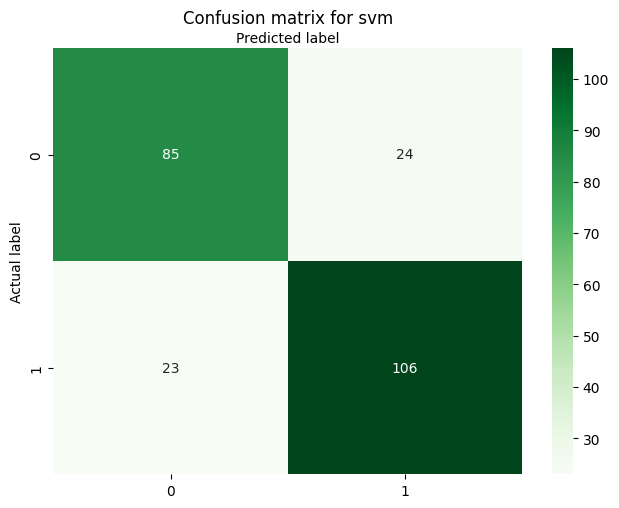

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_pred)  # Assuming Y_pred is from your SVM model
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Greens', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for svm')  # Changed title to 'svm'
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

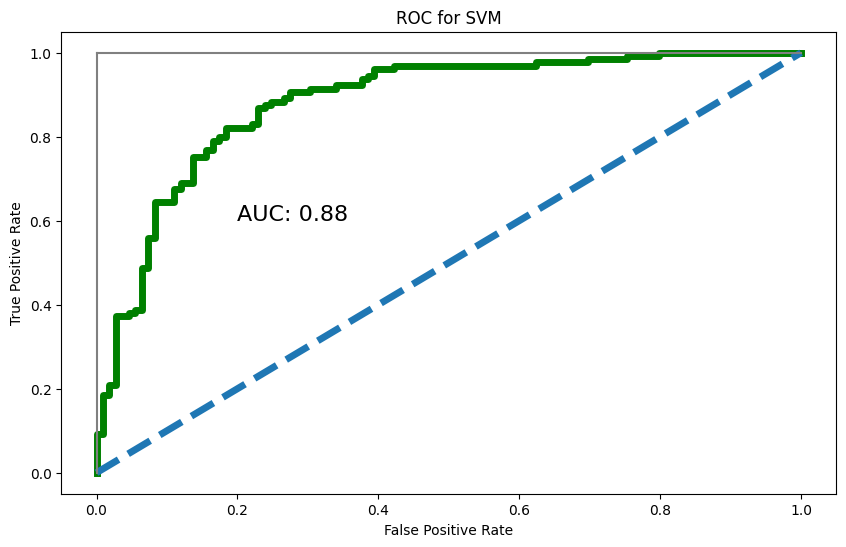

In [ ]:
# ROC Curve for SVM
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'model' is your trained SVM classifier
y_probabilities = model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

plt.figure(figsize=(10, 6))
plt.title('ROC for SVM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0, 1], ls='--', linewidth=5)
plt.plot([0, 0], [1, 0], c='.5')
plt.plot([1, 1], c='.5')
plt.text(0.2, 0.6, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

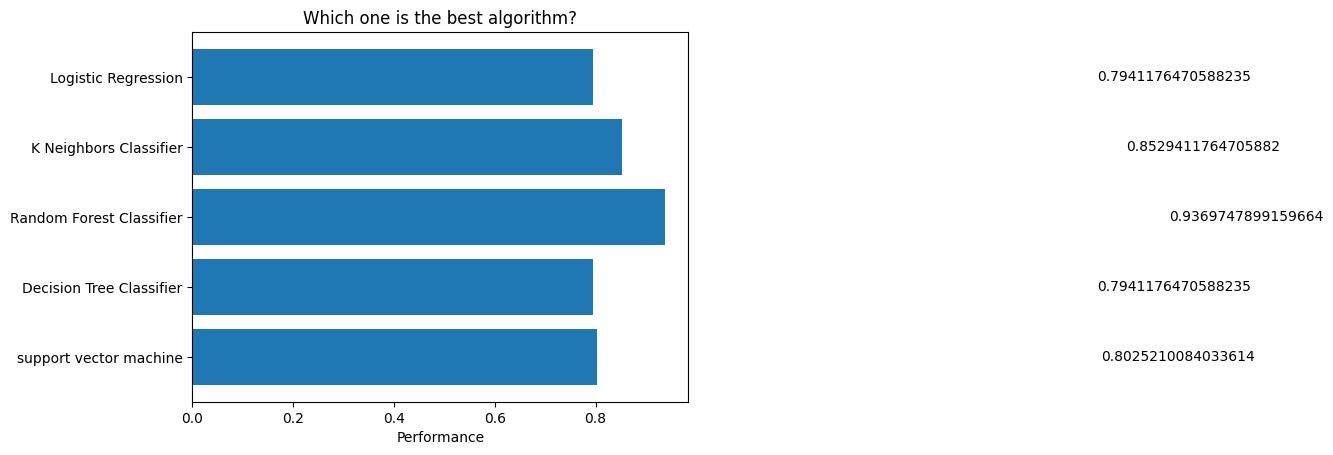

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier','support vector machine')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc,score_svm) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [ ]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print("Decision Tree Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)
if score_svm > score:
    score = score_svm
    output = out_svm
    print("support vector machine!", score)


Logistic Regression! 0.7941176470588235
Random Forest Classifier! 0.9369747899159664


In [ ]:
output.to_csv('output.csv', index=False)
print("Success!")

Success!


In [ ]:
output.head(3)

,Predicted
0,1
1,1
2,1


In [ ]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Decision Tree Classifier']=[score_dtc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]
results.loc['support vector machine']=[score_svm]

In [ ]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,0.936975
K-Neighbors Classifier,0.852941
support vector machine,0.802521
Logistic Regression,0.794118
Decision Tree Classifier,0.794118
